In [122]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
dsj = pd.read_csv("DS_jobs.csv")
dsj.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


# Data Cleaning

In [124]:
dsj['Company Name'].unique()

array(['Healthfirst\n3.1', 'ManTech\n4.2', 'Analysis Group\n3.8',
       'INFICON\n3.5', 'Affinity Solutions\n2.9', 'HG Insights\n4.2',
       'Novartis\n3.9', 'iRobot\n3.5', 'Intuit - Data\n4.4',
       'XSELL Technologies\n3.6', 'Novetta\n4.5', '1904labs\n4.7',
       'PNNL\n3.7', 'Old World Industries\n3.1',
       'Mathematica Policy Research\n3.4',
       'Guzman & Griffin Technologies (GGTI)\n4.4',
       'Upside Business Travel\n4.1', 'Buckman\n3.5',
       'Insight Enterprises, Inc.\n4.2', 'Tower Health\n3.5',
       'Triplebyte\n3.2', 'PulsePoint\n4.3', 'Exponent\n3.5',
       'Guardian Life\n3.5',
       'Spectrum Communications and Consulting\n3.4',
       'Oversight Systems\n4.7', 'LSQ\n4.2',
       'MIT Lincoln Laboratory\n3.8', 'Kingfisher Systems\n4.5',
       'Formation\n2.8', 'Cohere Health\n5.0', 'Acuity Insurance\n4.8',
       'Chef\n3.6', 'Puget Sound Energy\n3.3', 'Sandhills Global\n2.7',
       'A Place for Mom\n2.7', 'Great-Circle Technologies\n2.2',
       'Edmu

In [125]:
# Extracting just the Company Name for each job posting
dsj['Company Name'] = dsj['Company Name'].apply(lambda x : x.split('\n')[0])
dsj['Company Name'].unique()

array(['Healthfirst', 'ManTech', 'Analysis Group', 'INFICON',
       'Affinity Solutions', 'HG Insights', 'Novartis', 'iRobot',
       'Intuit - Data', 'XSELL Technologies', 'Novetta', '1904labs',
       'PNNL', 'Old World Industries', 'Mathematica Policy Research',
       'Guzman & Griffin Technologies (GGTI)', 'Upside Business Travel',
       'Buckman', 'Insight Enterprises, Inc.', 'Tower Health',
       'Triplebyte', 'PulsePoint', 'Exponent', 'Guardian Life',
       'Spectrum Communications and Consulting', 'Oversight Systems',
       'LSQ', 'MIT Lincoln Laboratory', 'Kingfisher Systems', 'Formation',
       'Cohere Health', 'Acuity Insurance', 'Chef', 'Puget Sound Energy',
       'Sandhills Global', 'A Place for Mom', 'Great-Circle Technologies',
       'Edmunds.com', 'Cambridge Associates, LLC',
       'Liberty Mutual Insurance', 'Cenlar', 'Arsenal Biosciences',
       'Eversight', 'Pfizer', 'Klaviyo', 'Intellectual Ventures',
       'GovTech', 'Quick Base', 'Giving Assistant', 'T

In [126]:
dsj['Salary Estimate'].unique()

array(['$137K-$171K (Glassdoor est.)', '$75K-$131K (Glassdoor est.)',
       '$79K-$131K (Glassdoor est.)', '$99K-$132K (Glassdoor est.)',
       '$90K-$109K (Glassdoor est.)', '$101K-$165K (Glassdoor est.)',
       '$56K-$97K (Glassdoor est.)', '$79K-$106K (Glassdoor est.)',
       '$71K-$123K (Glassdoor est.)', '$90K-$124K (Glassdoor est.)',
       '$91K-$150K (Glassdoor est.)', '$141K-$225K (Glassdoor est.)',
       '$145K-$225K(Employer est.)', '$79K-$147K (Glassdoor est.)',
       '$122K-$146K (Glassdoor est.)', '$112K-$116K (Glassdoor est.)',
       '$110K-$163K (Glassdoor est.)', '$124K-$198K (Glassdoor est.)',
       '$79K-$133K (Glassdoor est.)', '$69K-$116K (Glassdoor est.)',
       '$31K-$56K (Glassdoor est.)', '$95K-$119K (Glassdoor est.)',
       '$212K-$331K (Glassdoor est.)', '$66K-$112K (Glassdoor est.)',
       '$128K-$201K (Glassdoor est.)', '$138K-$158K (Glassdoor est.)',
       '$80K-$132K (Glassdoor est.)', '$87K-$141K (Glassdoor est.)',
       '$92K-$155K (Glassdo

In [127]:
#Removing "(Glassdoor est) and $ tags from Salary Estimate column
dsj['Salary Estimate'] = dsj['Salary Estimate'].apply(lambda x : x.split(' ')[0])
dsj['Salary Estimate'] = dsj['Salary Estimate'].apply(lambda x : x.split('(')[0])
dsj['Salary Estimate'] = dsj['Salary Estimate'].replace(r'\$',' ', regex=True)
dsj['Salary Estimate'] = dsj['Salary Estimate'].replace(r'K',' ', regex=True)
dsj['Salary Estimate'] = dsj['Salary Estimate'].str.strip()
dsj['Salary Estimate'].unique()

array(['137 - 171', '75 - 131', '79 - 131', '99 - 132', '90 - 109',
       '101 - 165', '56 - 97', '79 - 106', '71 - 123', '90 - 124',
       '91 - 150', '141 - 225', '145 - 225', '79 - 147', '122 - 146',
       '112 - 116', '110 - 163', '124 - 198', '79 - 133', '69 - 116',
       '31 - 56', '95 - 119', '212 - 331', '66 - 112', '128 - 201',
       '138 - 158', '80 - 132', '87 - 141', '92 - 155', '105 - 167'],
      dtype=object)

In [128]:
# Dropping all irrelevant columns from dataframe
dsj = dsj.drop(['index', 'Revenue', 'Sector', 'Competitors', 'Founded'], axis = 'columns')
dsj.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry
0,Sr Data Scientist,137 - 171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers
1,Data Scientist,137 - 171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development
2,Data Scientist,137 - 171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting
3,Data Scientist,137 - 171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing
4,Data Scientist,137 - 171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing


In [129]:
dsj.shape

(672, 10)

In [130]:
#Deleting rows with values of "-1"
dsj = dsj.loc[dsj['Industry'] != "-1"]
dsj = dsj.loc[dsj['Rating'] != -1.]

In [131]:
#Deleted 78 rows
dsj.shape

(594, 10)

In [132]:
# Removing newline tags from 'Job Description' column
dsj['Job Description'] = dsj['Job Description'].replace(r'\n',' ', regex=True)
dsj.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry
0,Sr Data Scientist,137 - 171,Description The Senior Data Scientist is resp...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers
1,Data Scientist,137 - 171,"Secure our Nation, Ignite your Future Join th...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development
2,Data Scientist,137 - 171,Overview Analysis Group is one of the larges...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting
3,Data Scientist,137 - 171,JOB DESCRIPTION: Do you have a passion for Da...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing
4,Data Scientist,137 - 171,Data Scientist Affinity Solutions / Marketing ...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing


In [133]:
# Converting Salary Estimate to an average
def convert_salary_to_avg(x):
    ranges = x.split('-')
    if len(ranges) == 2:
           return(float(ranges[0]) + float(ranges[1])) / 2
    try:
        return float(x)
    except:
        return None

In [134]:
#Testing function
convert_salary_to_avg("79 - 106")

92.5

In [135]:
# Converting the Salary Estimate column from displaying a range to an anverage
dsj['Salary Estimate'] = dsj['Salary Estimate'].apply(convert_salary_to_avg)

In [136]:
dsj.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry
0,Sr Data Scientist,154.0,Description The Senior Data Scientist is resp...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers
1,Data Scientist,154.0,"Secure our Nation, Ignite your Future Join th...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development
2,Data Scientist,154.0,Overview Analysis Group is one of the larges...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting
3,Data Scientist,154.0,JOB DESCRIPTION: Do you have a passion for Da...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing
4,Data Scientist,154.0,Data Scientist Affinity Solutions / Marketing ...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing


In [144]:
#checking for anymore null values in data set
dsj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 0 to 671
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          594 non-null    object 
 1   Salary Estimate    594 non-null    float64
 2   Job Description    594 non-null    object 
 3   Rating             594 non-null    float64
 4   Company Name       594 non-null    object 
 5   Location           594 non-null    object 
 6   Headquarters       594 non-null    object 
 7   Size               594 non-null    object 
 8   Type of ownership  594 non-null    object 
 9   Industry           594 non-null    object 
dtypes: float64(2), object(8)
memory usage: 51.0+ KB


# Data Visulization

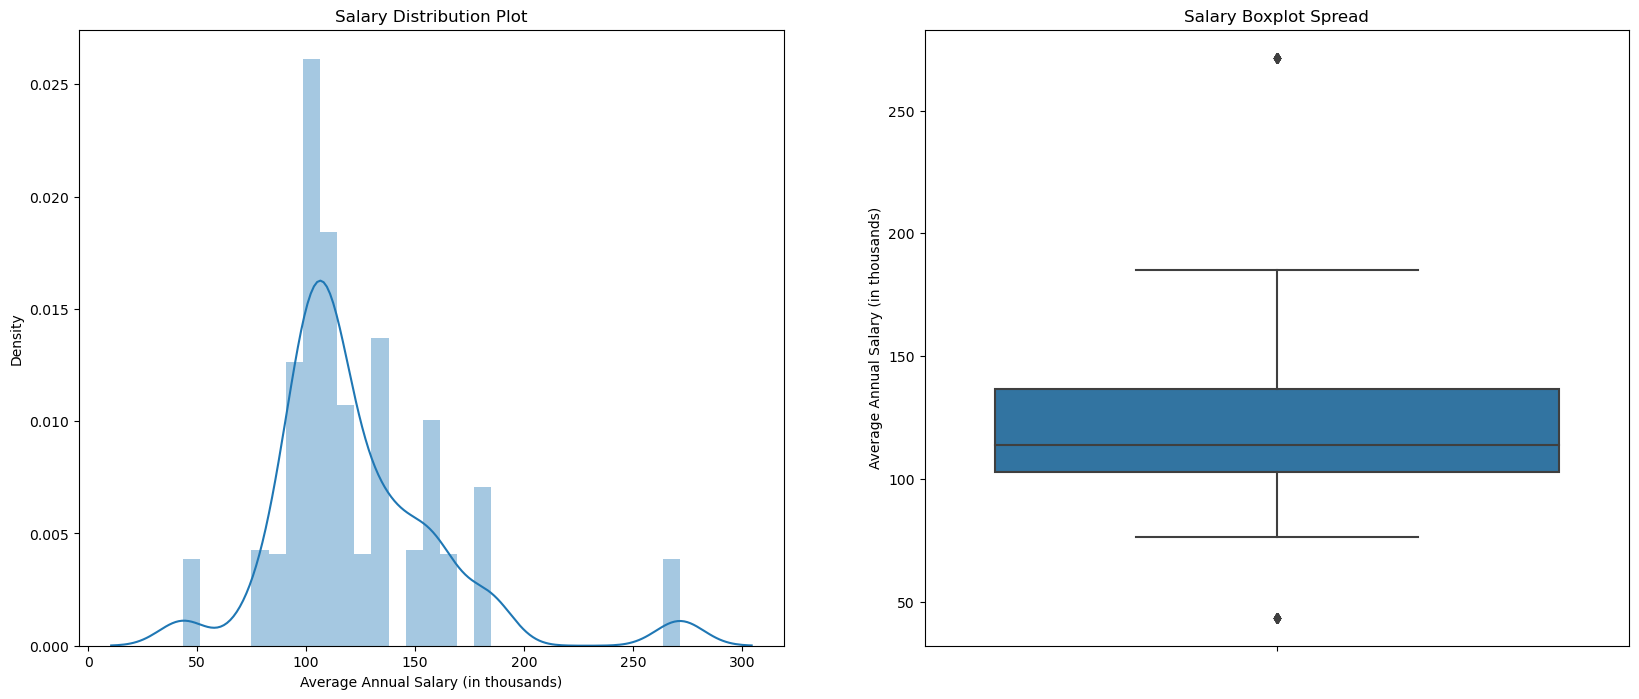

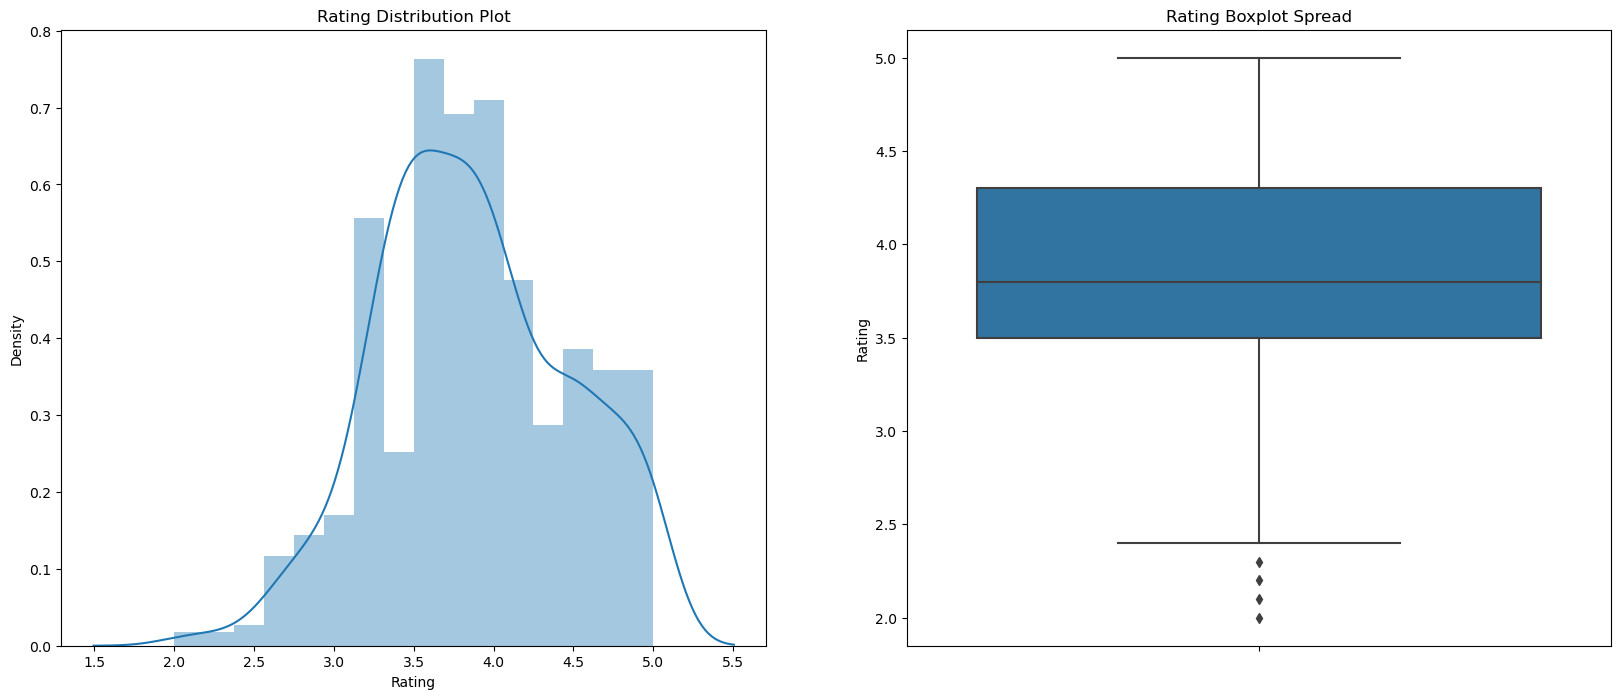

In [143]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Salary Distribution Plot')
dsj_distplot = sns.distplot(dsj['Salary Estimate'])
dsj_distplot.set(xlabel = 'Average Annual Salary (in thousands)')

plt.subplot(1,2,2)
plt.title('Salary Boxplot Spread')
dsj_boxplot = sns.boxplot(y = dsj['Salary Estimate'])
dsj_boxplot.set(ylabel = 'Average Annual Salary (in thousands)')

plt.show()

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Rating Distribution Plot')
dsj_distplot = sns.distplot(dsj['Rating'])
dsj_distplot.set(xlabel = 'Rating')

plt.subplot(1,2,2)
plt.title('Rating Boxplot Spread')
dsj_boxplot = sns.boxplot(y = dsj['Rating'])
dsj_boxplot.set(ylabel = 'Rating')

plt.show()

- Most data scientist postions in this data set seem to make around the range of 70k - 130k

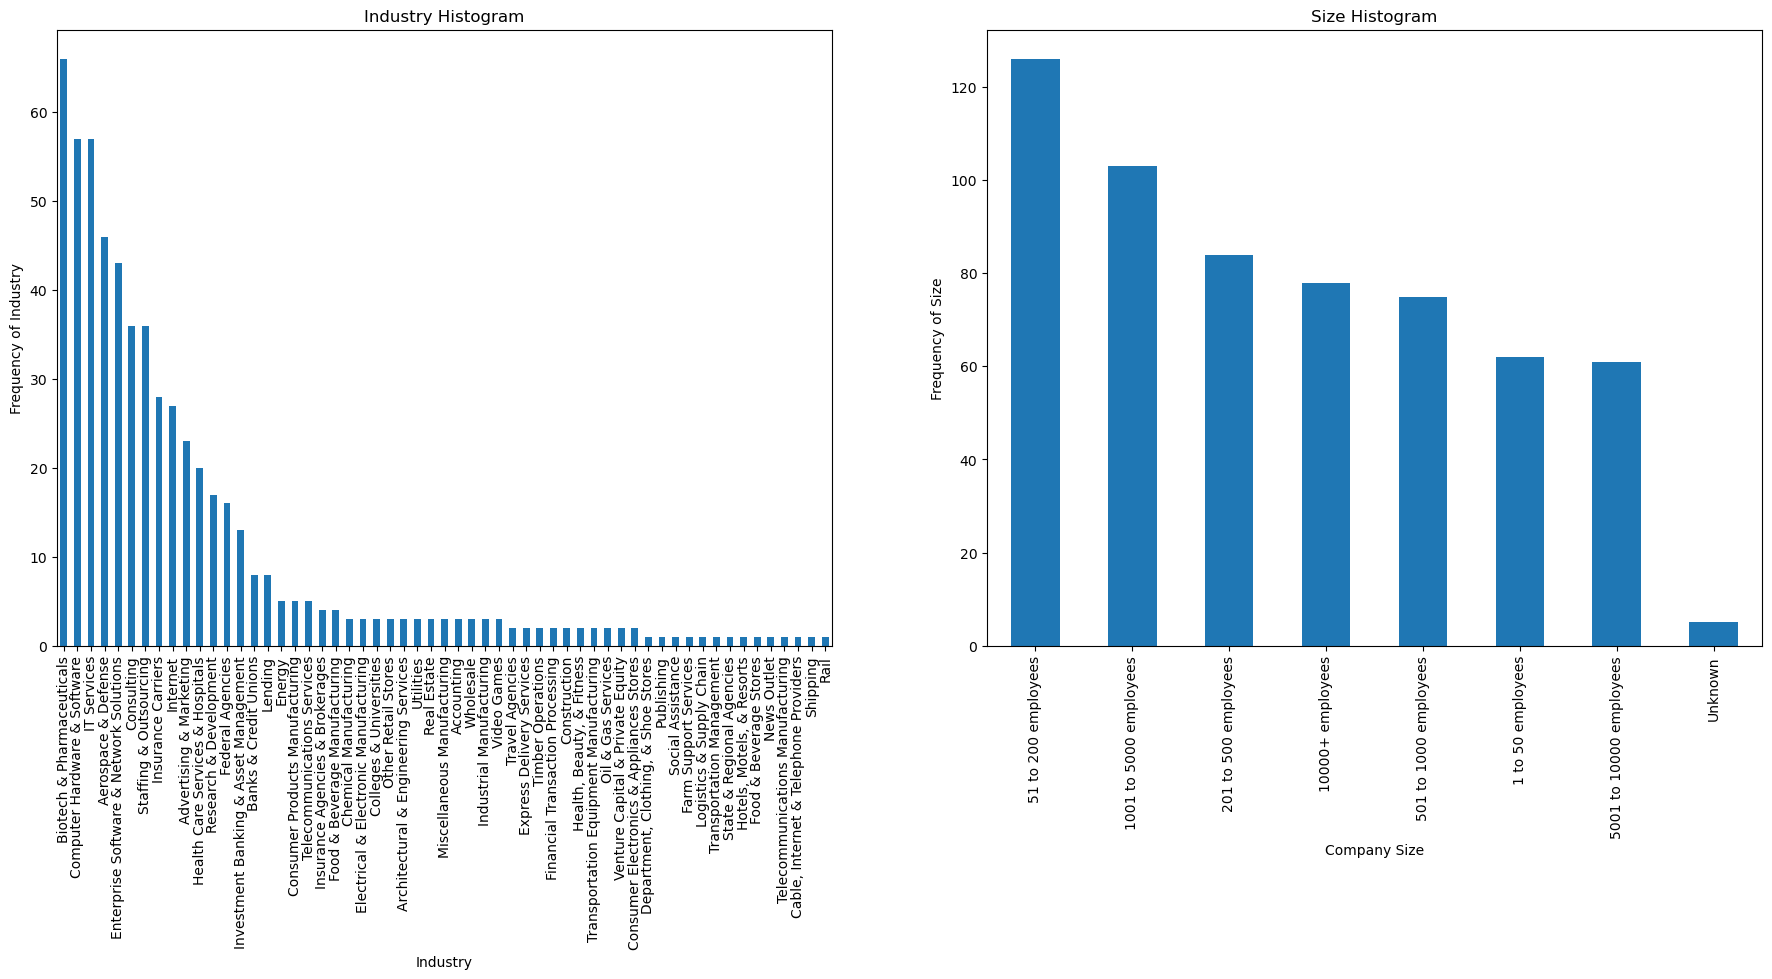

In [149]:
plt.figure(figsize = (34,8))

plt.subplot(1,3,1)
plt1 = dsj['Industry'].value_counts().plot(kind = 'bar')
plt.title("Industry Histogram")
plt1.set(xlabel = 'Industry', ylabel = 'Frequency of Industry')

plt.subplot(1,3,2)
plt1 = dsj['Size'].value_counts().plot(kind = 'bar')
plt.title("Size Histogram")
plt1.set(xlabel = 'Company Size', ylabel = 'Frequency of Size')

plt.show()

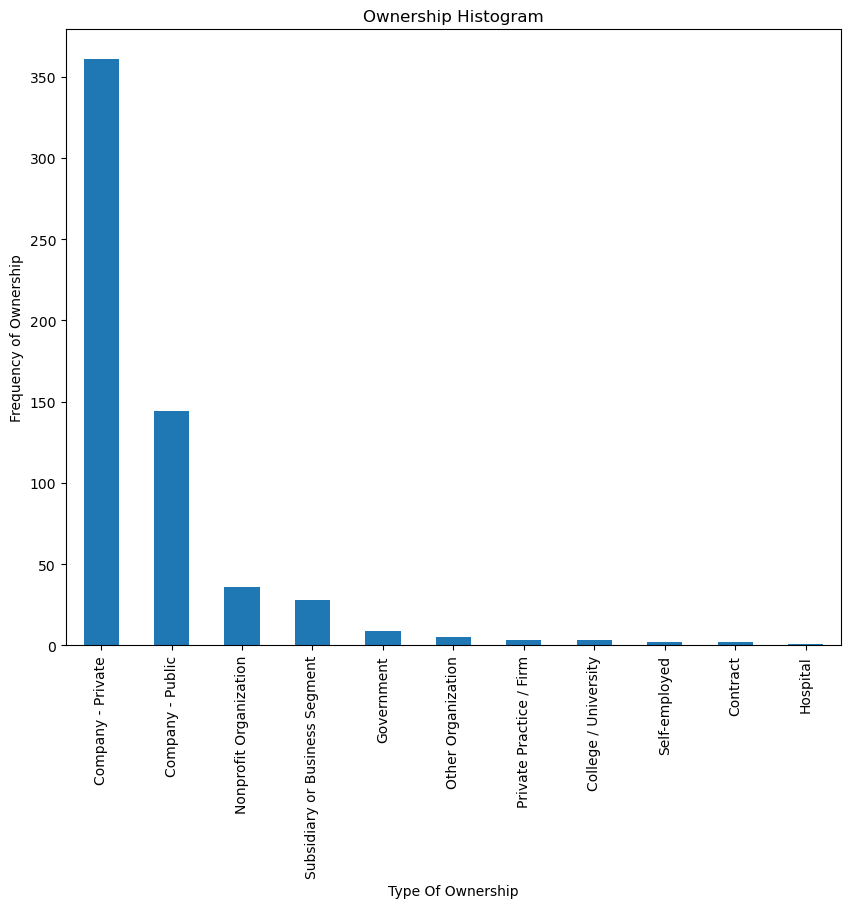

In [155]:
plt.figure(figsize = (34,8))

plt.subplot(1,3,1)
plt1 = dsj['Type of ownership'].value_counts().plot(kind = 'bar')
plt.title("Ownership Histogram")
plt1.set(xlabel = 'Type Of Ownership', ylabel = 'Frequency of Ownership')

plt.show()

<Axes: title={'center': 'Type of Ownership vs Salary'}, xlabel='Type of ownership', ylabel='Salary Estimate'>

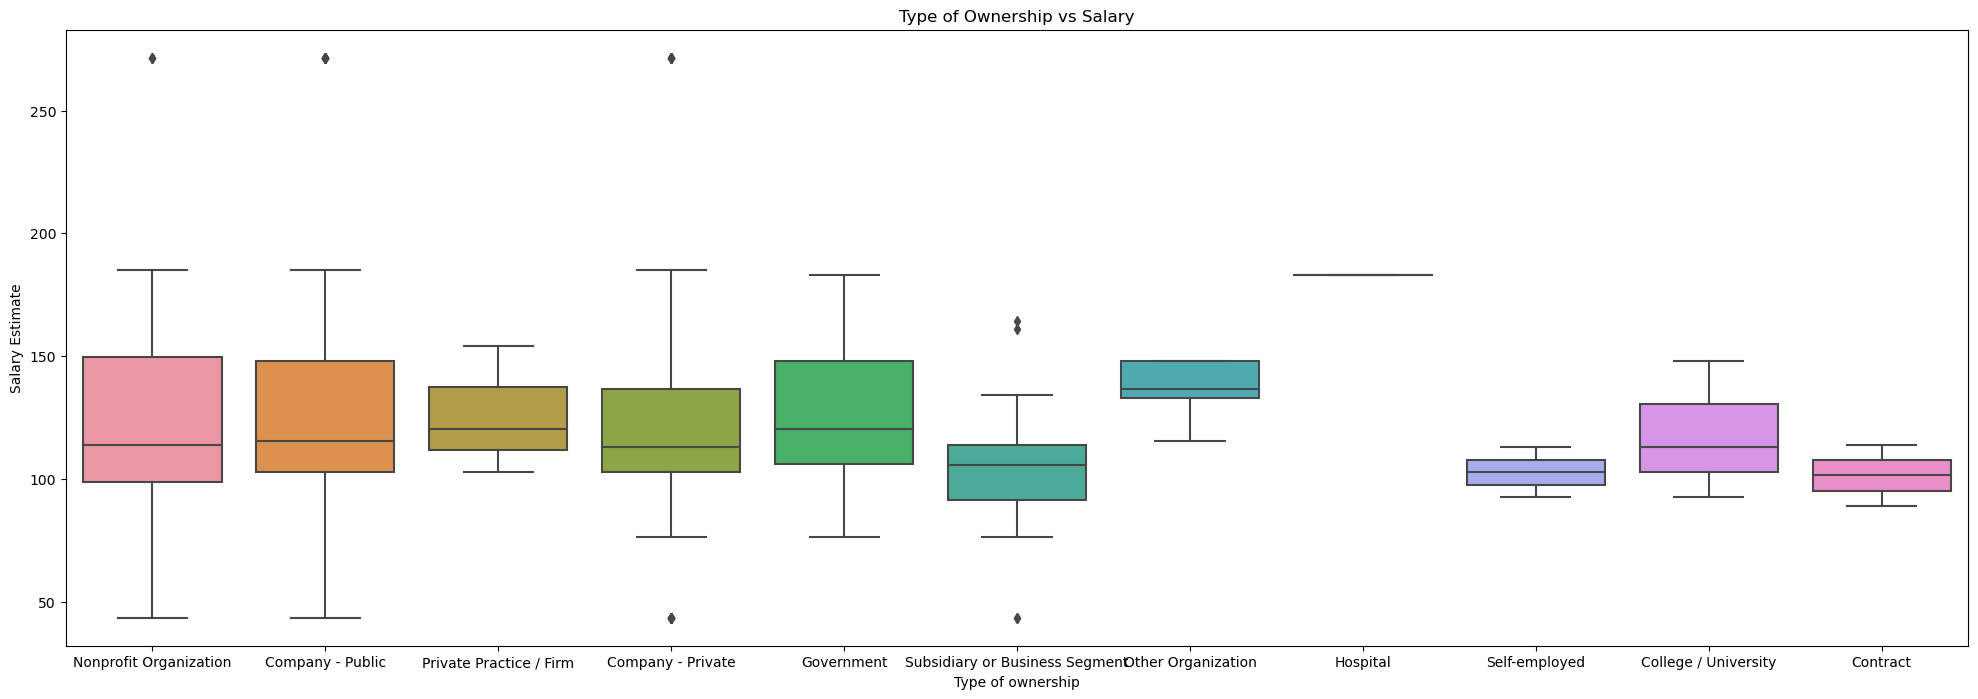

In [163]:
plt.figure(figsize = (54,8))

plt.subplot(1,2,2)
plt.title('Type of Ownership vs Salary')
sns.boxplot(x = dsj['Type of ownership'], y = dsj['Salary Estimate'])